In [45]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from numpy import asarray
import seaborn as sns
import rioxarray as rxr
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import xarray as xr
import pandas as pd
import glob
import os
import rasterstats as rs
from rasterstats import zonal_stats, point_query
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [92]:
S2_NDCI = '/mnt/nfs/lss/meerdink/data/backed_up/skzebarth/24_spring/GP_GP_Final/Sentinel-2_BSL_NDCI.tif'
sampling_points = '/mnt/nfs/lss/meerdink/data/backed_up/skzebarth/23_BSL/9_11_23_loqate/9_11_23.shp'

In [93]:
NDCI = rio.open(S2_NDCI)
SP = gpd.read_file(sampling_points)
SP_transform = SP.to_crs(32615)
SP

,esrignss_s,esrignss_d,esrisnsr_a,esrignss_p,esrignss_r,esrignss_h,esrignss_v,esrignss_l,esrignss_1,esrignss_a,...,Collected_,Test,Method,Environmen,Environm_1,Analyte,Value,Quant_Limi,JOIN,geometry
0,1.827077,232.694063,339.387358,3,"Trimble DA2, 6236100500",0.014831,0.063477,43.449047,-95.093822,398.241392,...,2023-09-11,chlorophyll a-lk,epa 445.0 rev 1.2,taylor samuel,s3,Chlorophyll A,34,1,3,POINT (-10585795.807 5380573.107)
1,0.839078,235.029814,90.591900,3,"Trimble DA2, 6236100500",0.015037,0.049563,43.448926,-95.102829,398.201848,...,2023-09-11,chlorophyll a-lk,epa 445.0 rev 1.2,taylor samuel,s2,Chlorophyll A,29,1,2,POINT (-10586798.525 5380554.510)
2,1.022552,204.829407,181.773863,3,"Trimble DA2, 6236100500",0.013128,0.037813,43.448725,-95.111635,398.233102,...,2023-09-11,chlorophyll a-lk,epa 445.0 rev 1.2,taylor samuel,s1,Chlorophyll A,40,1,1,POINT (-10587778.813 5380523.629)
3,1.276173,199.202269,104.811520,3,"Trimble DA2, 6236100500",0.015443,0.066406,43.455033,-95.111842,398.076997,...,2023-09-11,chlorophyll a-lk,epa 445.0 rev 1.2,taylor samuel,s4,Chlorophyll A,25,1,4,POINT (-10587801.799 5381491.004)
4,1.627264,215.864834,269.460535,3,"Trimble DA2, 6236100500",0.018823,0.071687,43.455181,-95.102980,398.030633,...,2023-09-11,chlorophyll a-lk,epa 445.0 rev 1.2,taylor samuel,s5,Chlorophyll A,36,1,5,POINT (-10586815.336 5381513.722)
5,0.966974,228.117346,141.449898,3,"Trimble DA2, 6236100500",0.014721,0.049969,43.455338,-95.093975,397.964491,...,2023-09-11,chlorophyll a-lk,epa 445.0 rev 1.2,taylor samuel,s6,Chlorophyll A,23,1,6,POINT (-10585812.831 5381537.782)
6,1.518398,205.546788,182.794335,3,"Trimble DA2, 6236100500",0.016106,0.050516,43.461795,-95.094260,398.074533,...,2023-09-11,chlorophyll a-lk,epa 445.0 rev 1.2,taylor samuel,s9,Chlorophyll A,21,1,9,POINT (-10585844.559 5382527.998)
7,4.514390,256.188297,179.021239,3,"Trimble DA2, 6236100500",0.013570,0.049008,43.461650,-95.103234,398.008929,...,2023-09-11,chlorophyll a-lk,epa 445.0 rev 1.2,taylor samuel,s8,Chlorophyll A,31,1,8,POINT (-10586843.572 5382505.727)
8,1.234674,215.062654,168.101460,3,"Trimble DA2, 6236100500",0.017847,0.048750,43.461485,-95.112057,398.025976,...,2023-09-11,chlorophyll a-lk,epa 445.0 rev 1.2,taylor samuel,s7,Chlorophyll A,22,1,7,POINT (-10587825.708 5382480.387)
9,0.681922,220.494014,334.261545,3,"Trimble DA2, 6236100500",0.016739,0.048211,43.467786,-95.112240,398.033858,...,2023-09-11,chlorophyll a-lk,epa 445.0 rev 1.2,taylor samuel,s10,Chlorophyll A,37,1,10,POINT (-10587846.131 5383446.808)


In [10]:
chl = SP['Value']

EPSG:32615
EPSG:32615


<Axes: >

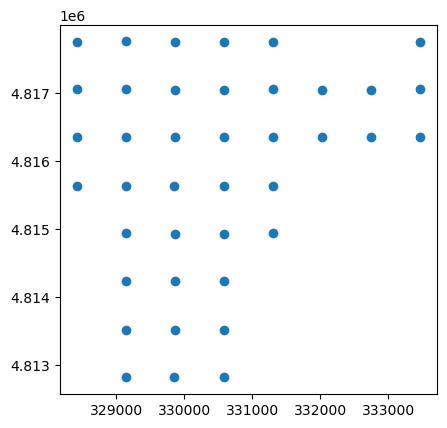

In [6]:
print(NDCI.crs)
print(SP_transform.crs)
SP_transform.plot()

In [94]:
R_ZS = zonal_stats(SP_transform, S2_NDCI)
R_PQ = point_query(SP_transform, S2_NDCI)
R_ZS

[{'min': 0.050932567566633224,
  'max': 0.050932567566633224,
  'mean': 0.050932567566633224,
  'count': 1},
 {'min': 0.056179776787757874,
  'max': 0.056179776787757874,
  'mean': 0.056179776787757874,
  'count': 1},
 {'min': 0.06431908160448074,
  'max': 0.06431908160448074,
  'mean': 0.06431908160448074,
  'count': 1},
 {'min': 0.05599425733089447,
  'max': 0.05599425733089447,
  'mean': 0.05599425733089447,
  'count': 1},
 {'min': 0.05637342855334282,
  'max': 0.05637342855334282,
  'mean': 0.05637342855334282,
  'count': 1},
 {'min': 0.05657604709267616,
  'max': 0.05657604709267616,
  'mean': 0.05657604709267616,
  'count': 1},
 {'min': 0.05052708089351654,
  'max': 0.05052708089351654,
  'mean': 0.05052708089351654,
  'count': 1},
 {'min': 0.057050593197345734,
  'max': 0.057050593197345734,
  'mean': 0.057050593197345734,
  'count': 1},
 {'min': 0.05474060773849487,
  'max': 0.05474060773849487,
  'mean': 0.05474060773849487,
  'count': 1},
 {'min': 0.052296821027994156,
  'max

In [71]:
mean = [point['mean'] for point in R_ZS]
mean

[0.050932567566633224,
 0.056179776787757874,
 0.06431908160448074,
 0.05599425733089447,
 0.05637342855334282,
 0.05657604709267616,
 0.05052708089351654,
 0.057050593197345734,
 0.05474060773849487,
 0.052296821027994156,
 0.059325043112039566,
 0.060035523027181625,
 0.06889049708843231,
 0.040556199848651886,
 0.0669485554099083,
 0.06464146822690964,
 0.06354748457670212,
 0.0622175894677639,
 0.06295651942491531,
 0.06671323627233505,
 0.046918123960494995,
 0.06277190893888474,
 0.06372374296188354,
 0.07155202329158783,
 0.0765027329325676,
 0.05293482169508934,
 0.06614509224891663,
 0.07818929851055145,
 0.07814113795757294,
 0.06171108037233353,
 0.0699300691485405,
 0.0699445977807045,
 0.07377900928258896,
 0.06731101125478745,
 0.06459412723779678,
 0.06403599679470062,
 0.0642009750008583,
 0.02414231188595295,
 0.0671798437833786,
 0.06652586907148361]

In [95]:
x = np.array(mean)
y = np.array(chl)

slope, intercept, r_value, p_value, std_err = linregress(x,y)
r_squared = r_value**2
r_squared

0.002934710911529761

In [107]:
df = pd.DataFrame({'x': x, 'y': y})
df_clean = df.dropna(subset=['x'])
df_final = df_clean[(df_clean['x'] <=1) & (df_clean['x'] >= .02)]
df_final

,x,y
0,0.050933,34
1,0.056180,29
2,0.064319,40
3,0.055994,25
4,0.056373,36
5,0.056576,23
6,0.050527,21
7,0.057051,31
8,0.054741,22
9,0.052297,37


In [108]:
new_x = list(df_final['x'])
new_y = list(df_final['y'])

slope, intercept, r_value, p_value, std_err = linregress(new_x, new_y)
r_squared = r_value**2
#r_squared
r_squared

0.002934710911529761

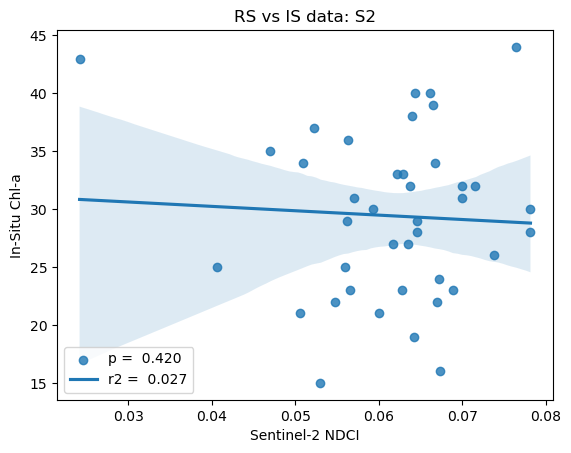

In [102]:

sns.regplot(x=x, y=y)
plt.xlabel('Sentinel-2 NDCI')
plt.ylabel('In-Situ Chl-a')
plt.title('RS vs IS data: S2')
plt.legend([f'p = {p_value: .3f}', f'r2 = {r_squared: .3f}'])
plt.show()

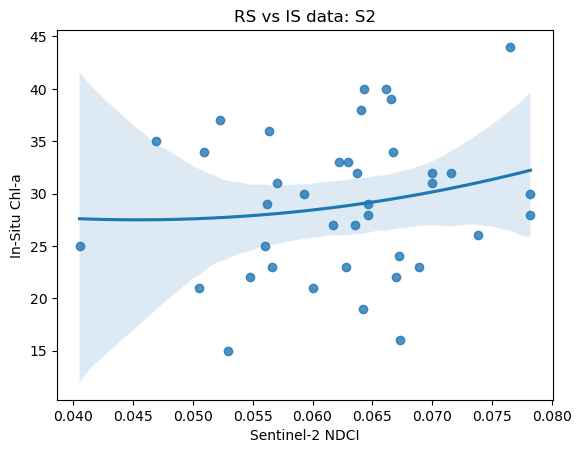

In [82]:
sns.regplot(x=z, y=a, order=2)
plt.xlabel('Sentinel-2 NDCI')
plt.ylabel('In-Situ Chl-a')
plt.title('RS vs IS data: S2')
plt.show()

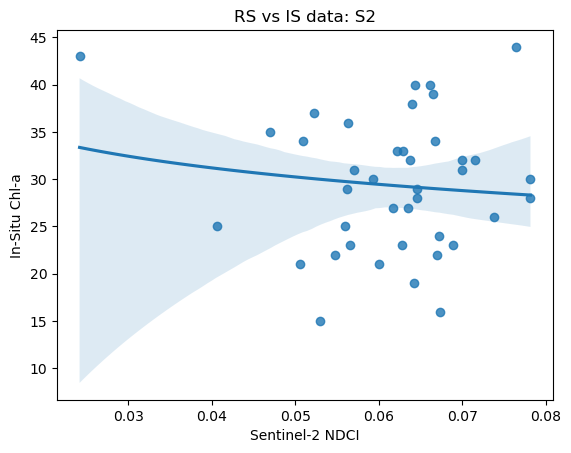

In [59]:
sns.regplot(x=x, y=y, logx=True)
plt.xlabel('Sentinel-2 NDCI')
plt.ylabel('In-Situ Chl-a')
plt.title('RS vs IS data: S2')
plt.show()